In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set( rc={'figure.figsize':(16,10)} )
merge_columns = ['Model', 'Horizon', 'Steps']

# Cumulative Rewards

In [92]:
cr = pd.read_excel('CumulativeReward.xlsx')
cr = cr[(cr['Slippery']==True)].reset_index( drop=True )
cr['Details'] = cr['Model'] + ' ( N=' + cr['Steps'].astype(str) + ', H=' + cr['Horizon'].astype(str) + ' )'
cr.sort_values( by=['Details'], inplace=True )
cr.head( )

,Slippery,Model,Horizon,Steps,Episode,CumulativeReward,Details
4376,True,FHTD,1,1,377,-992.90,"FHTD ( N=1, H=1 )"
4339,True,FHTD,1,1,340,-1168.35,"FHTD ( N=1, H=1 )"
4338,True,FHTD,1,1,339,-1169.55,"FHTD ( N=1, H=1 )"
4337,True,FHTD,1,1,338,-1171.85,"FHTD ( N=1, H=1 )"
4336,True,FHTD,1,1,337,-1170.40,"FHTD ( N=1, H=1 )"


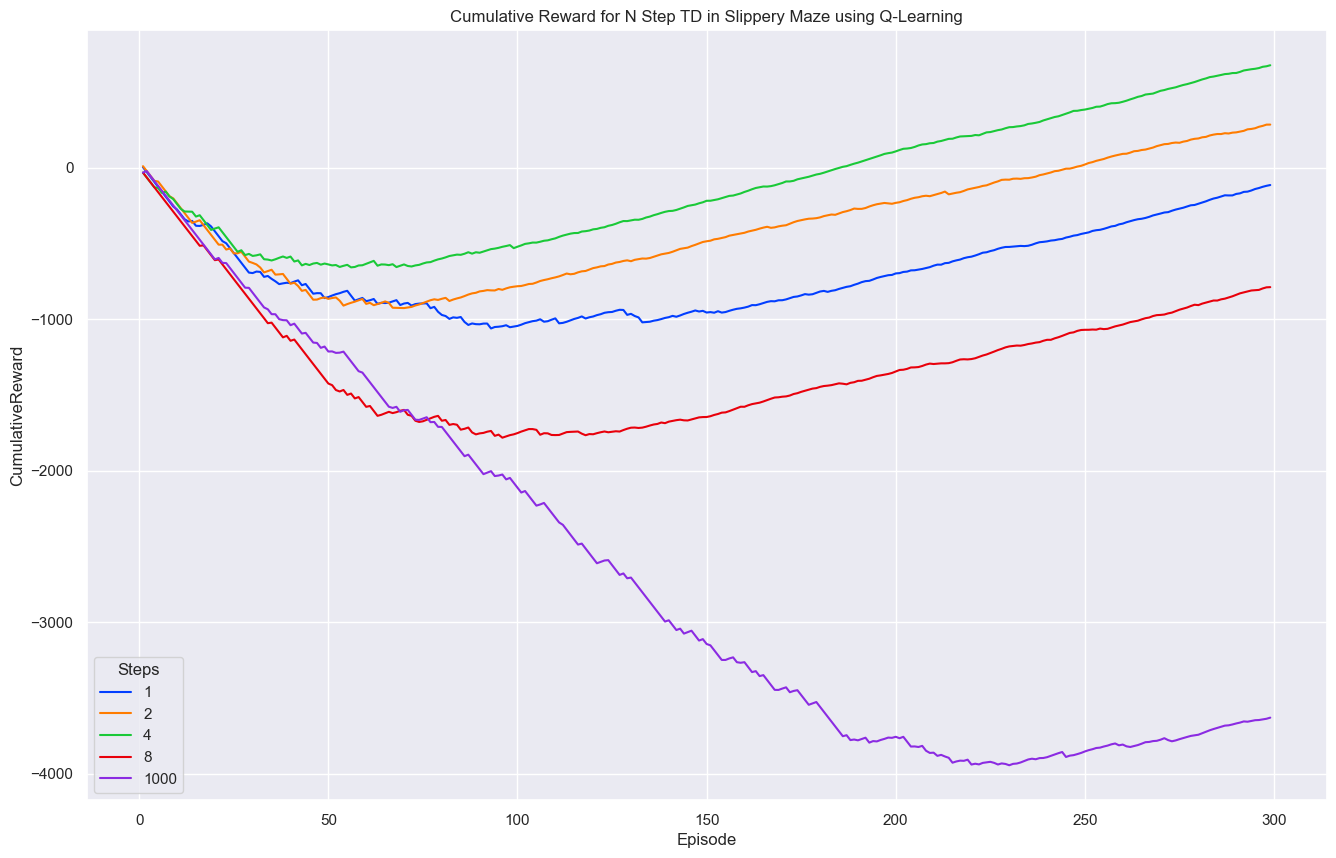

In [93]:
sns.lineplot( data=cr[(cr['Model']=='NSTEP') & (cr['Episode']<300)], x='Episode', y='CumulativeReward', hue='Steps', palette='bright' )
plt.title( 'Cumulative Reward for N Step TD in Slippery Maze using Q-Learning' )
plt.show( )

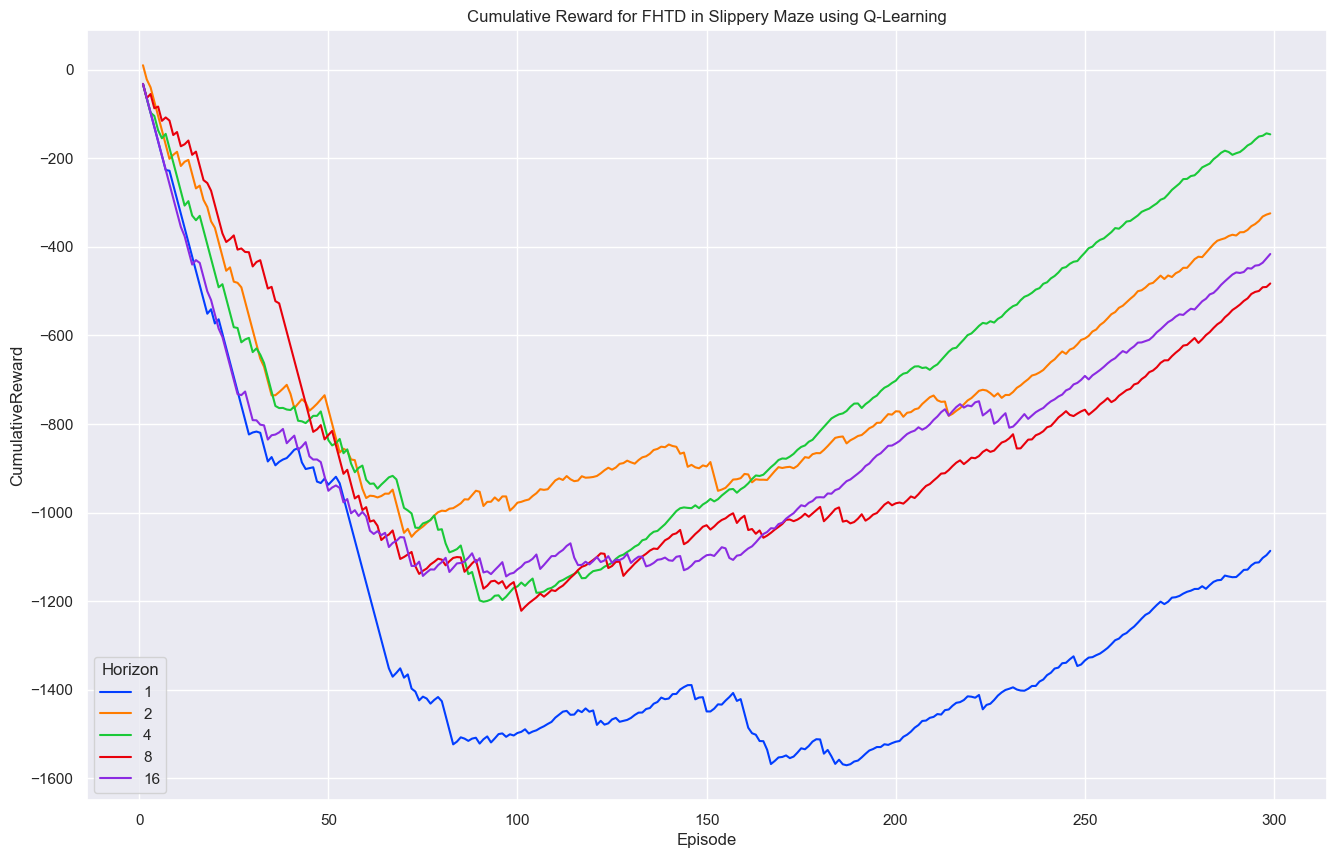

In [94]:
sns.lineplot( data=cr[(cr['Model']=='FHTD') & (cr['Episode']<300)], x='Episode', y='CumulativeReward', hue='Horizon', palette='bright' )
plt.title( 'Cumulative Reward for FHTD in Slippery Maze using Q-Learning' )
plt.show( )

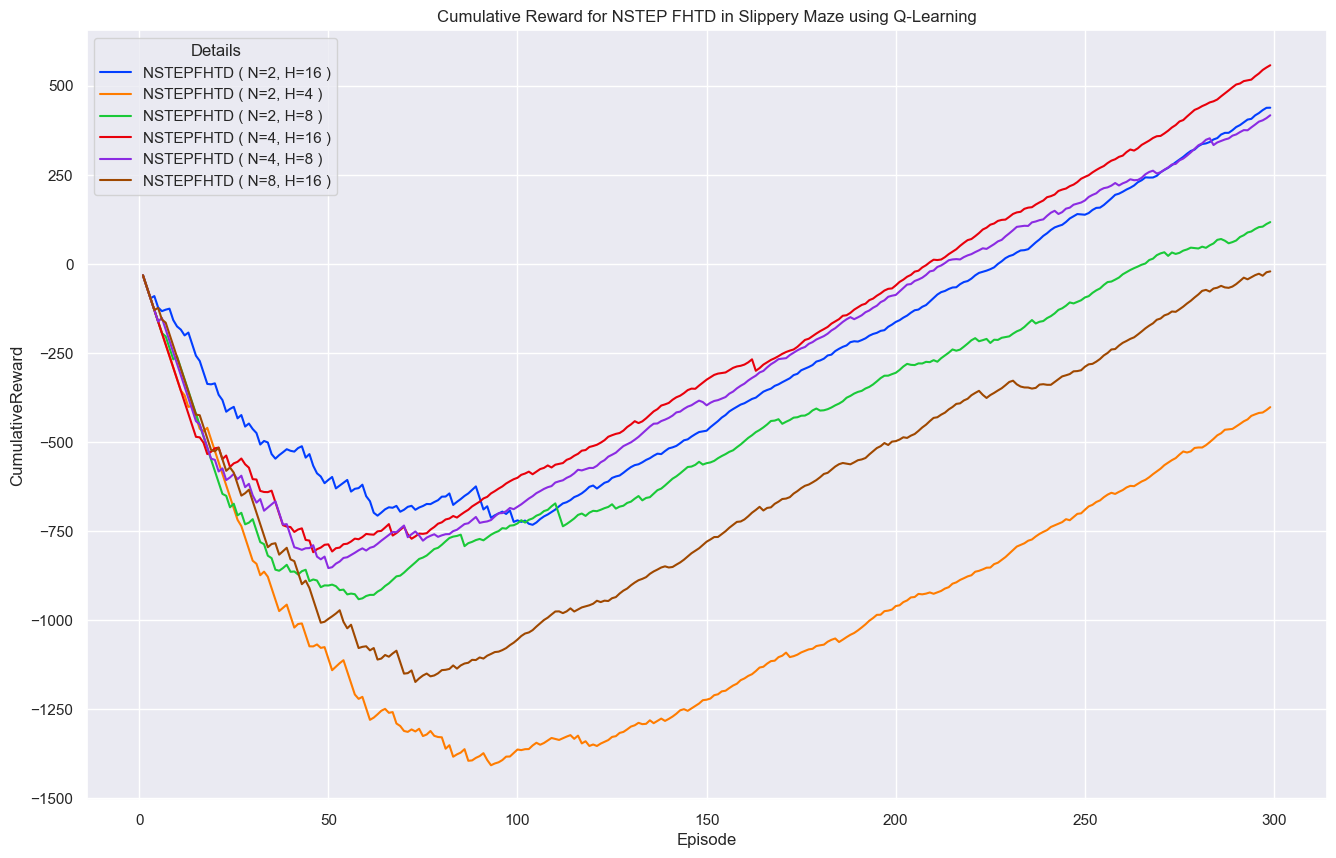

In [95]:
sns.lineplot( data=cr[(cr['Model']=='NSTEPFHTD') & (cr['Episode']<300)], x='Episode', y='CumulativeReward', hue='Details', palette='bright' )
plt.title( 'Cumulative Reward for NSTEP FHTD in Slippery Maze using Q-Learning' )
plt.show( )

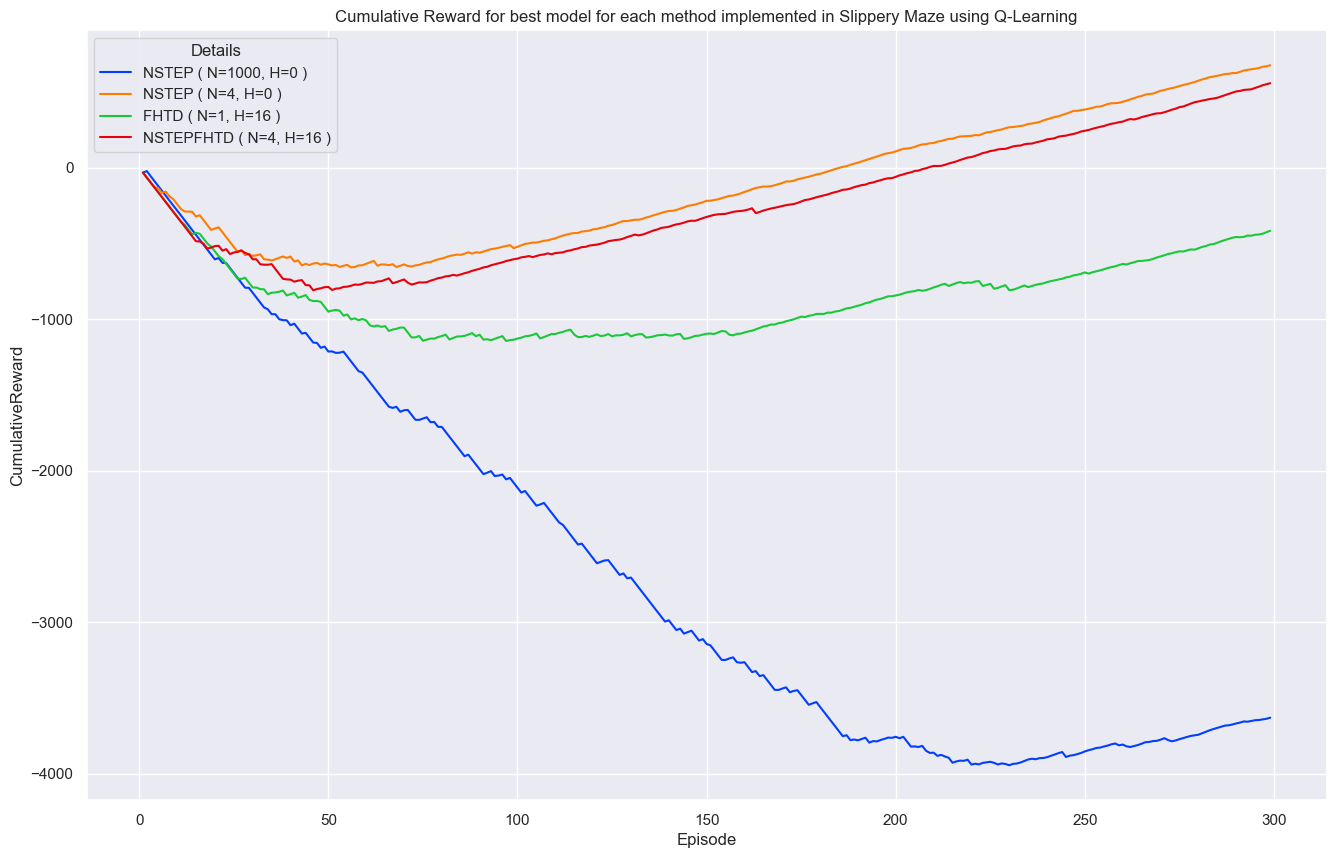

In [103]:
cr_best = pd.concat( [
    cr[(cr['Steps']==1000)],
    cr.merge( cr[(cr['Model']=='NSTEP')].sort_values( by='CumulativeReward', ascending=False )[:1][merge_columns], how='inner', on=merge_columns ),
    cr.merge( cr[(cr['Model']=='FHTD')].sort_values( by='CumulativeReward', ascending=False )[:1][merge_columns], how='inner', on=merge_columns ),
    cr.merge( cr[(cr['Model']=='NSTEPFHTD')].sort_values( by='CumulativeReward', ascending=False )[:1][merge_columns], how='inner', on=merge_columns )
], ignore_index=True )

sns.lineplot( data=cr_best[(cr_best['Episode']<300)], x='Episode', y='CumulativeReward', hue='Details', palette='bright' )
plt.title( 'Cumulative Reward for best model for each method implemented in Slippery Maze using Q-Learning' )
plt.show( )

# Convergence / Win Rate over Episodes

In [111]:
wr = pd.read_excel( 'WinRate.xlsx' )
wr = wr[(wr['Slippery']==True)].reset_index( drop=True )
wr['Details'] = wr['Model'] + ' ( N=' + wr['Steps'].astype(str) + ', H=' + wr['Horizon'].astype(str) + ' )'
wr.sort_values( by=['Details', 'Episode'], inplace=True )
wr.head( )

,Slippery,Model,Horizon,Steps,Episode,WinRate,Details
800,True,FHTD,1,1,5,0.045455,"FHTD ( N=1, H=1 )"
801,True,FHTD,1,1,10,0.113636,"FHTD ( N=1, H=1 )"
802,True,FHTD,1,1,15,0.136364,"FHTD ( N=1, H=1 )"
803,True,FHTD,1,1,20,0.113636,"FHTD ( N=1, H=1 )"
804,True,FHTD,1,1,25,0.068182,"FHTD ( N=1, H=1 )"


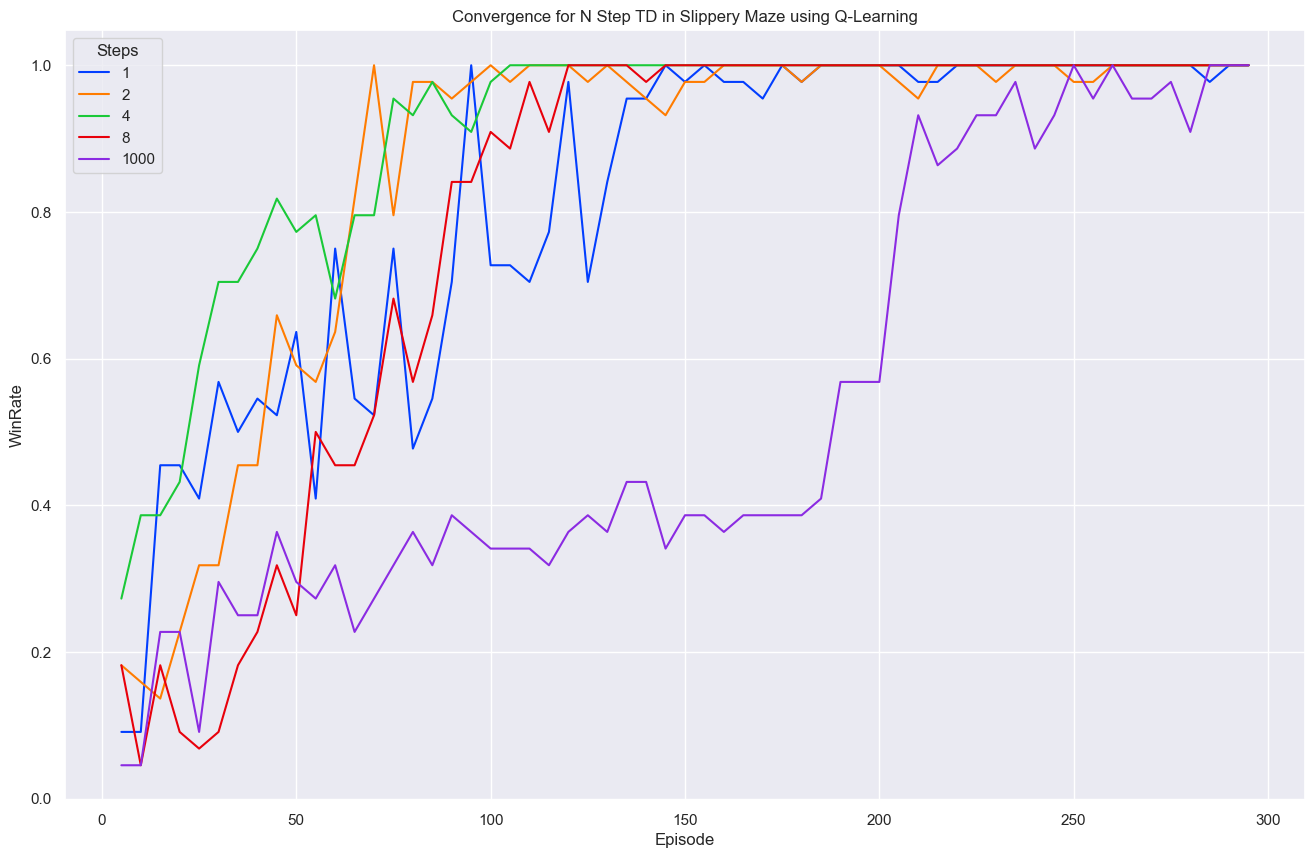

In [105]:
sns.lineplot( data=wr[(wr['Model']=='NSTEP') & (wr['Episode']<300)], x='Episode', y='WinRate', hue='Steps', palette='bright' )
plt.title( 'Convergence for N Step TD in Slippery Maze using Q-Learning' )
plt.show( )

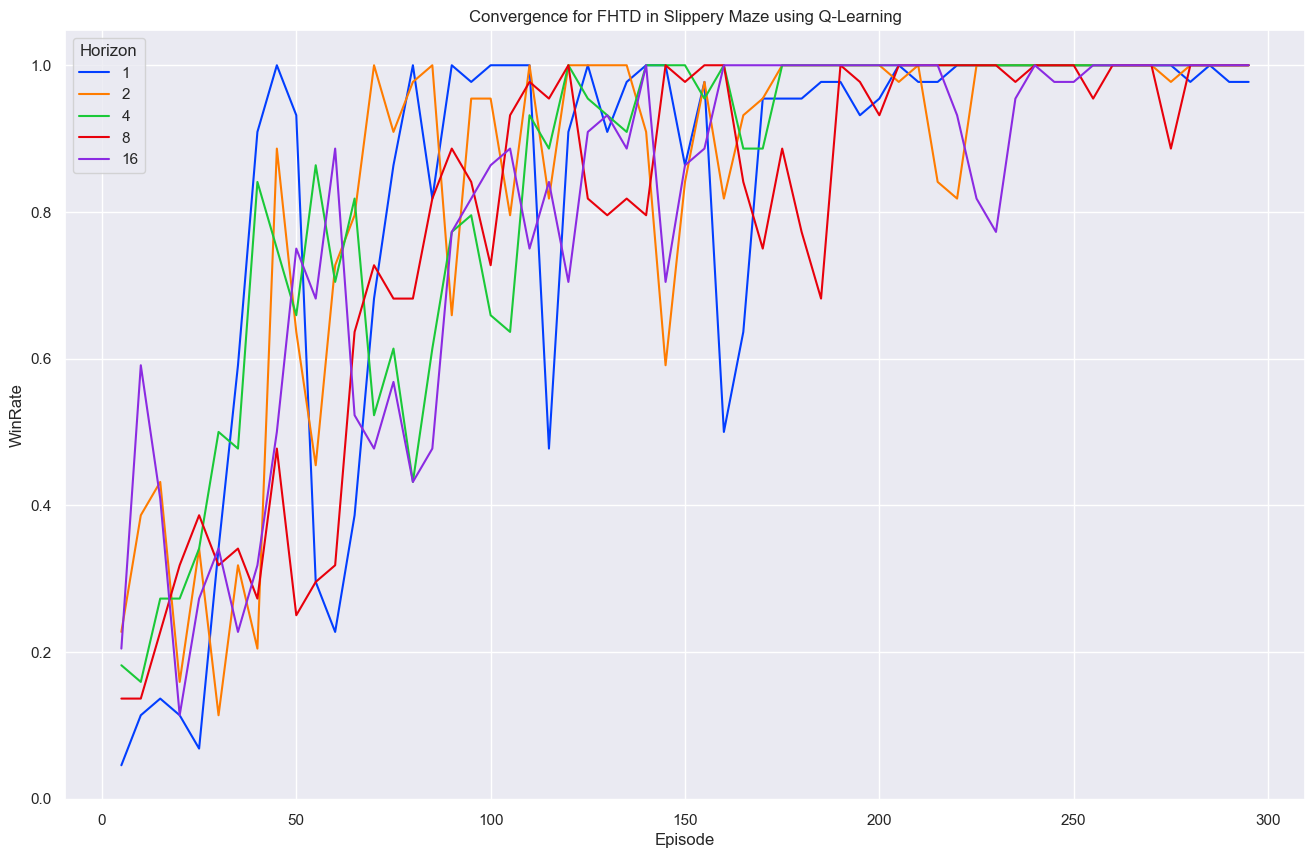

In [106]:
sns.lineplot( data=wr[(wr['Model']=='FHTD') & (wr['Episode']<300)], x='Episode', y='WinRate', hue='Horizon', palette='bright' )
plt.title( 'Convergence for FHTD in Slippery Maze using Q-Learning' )
plt.show( )

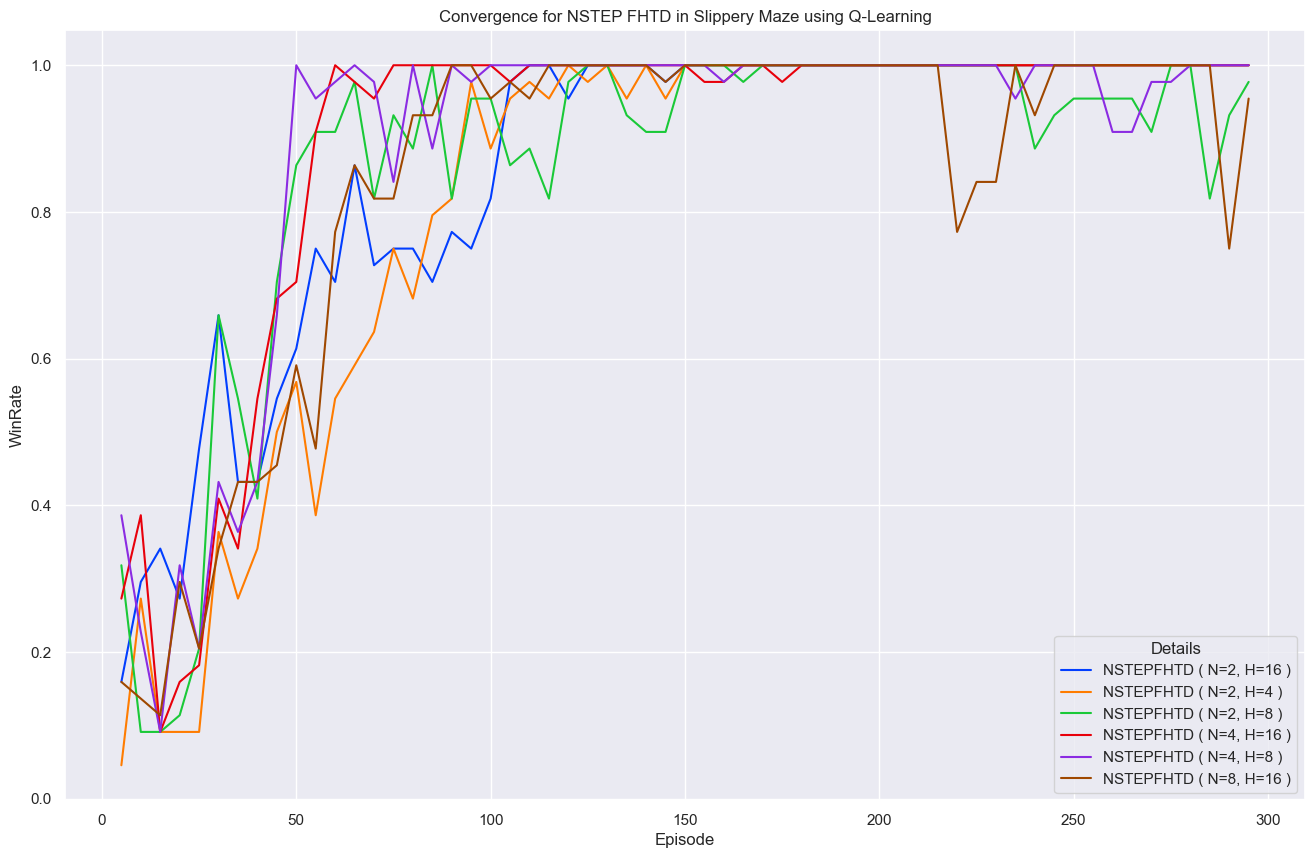

In [107]:
sns.lineplot( data=wr[(wr['Model']=='NSTEPFHTD') & (wr['Episode']<300)], x='Episode', y='WinRate', hue='Details', palette='bright' )
plt.title( 'Convergence for NSTEP FHTD in Slippery Maze using Q-Learning' )
plt.show( )

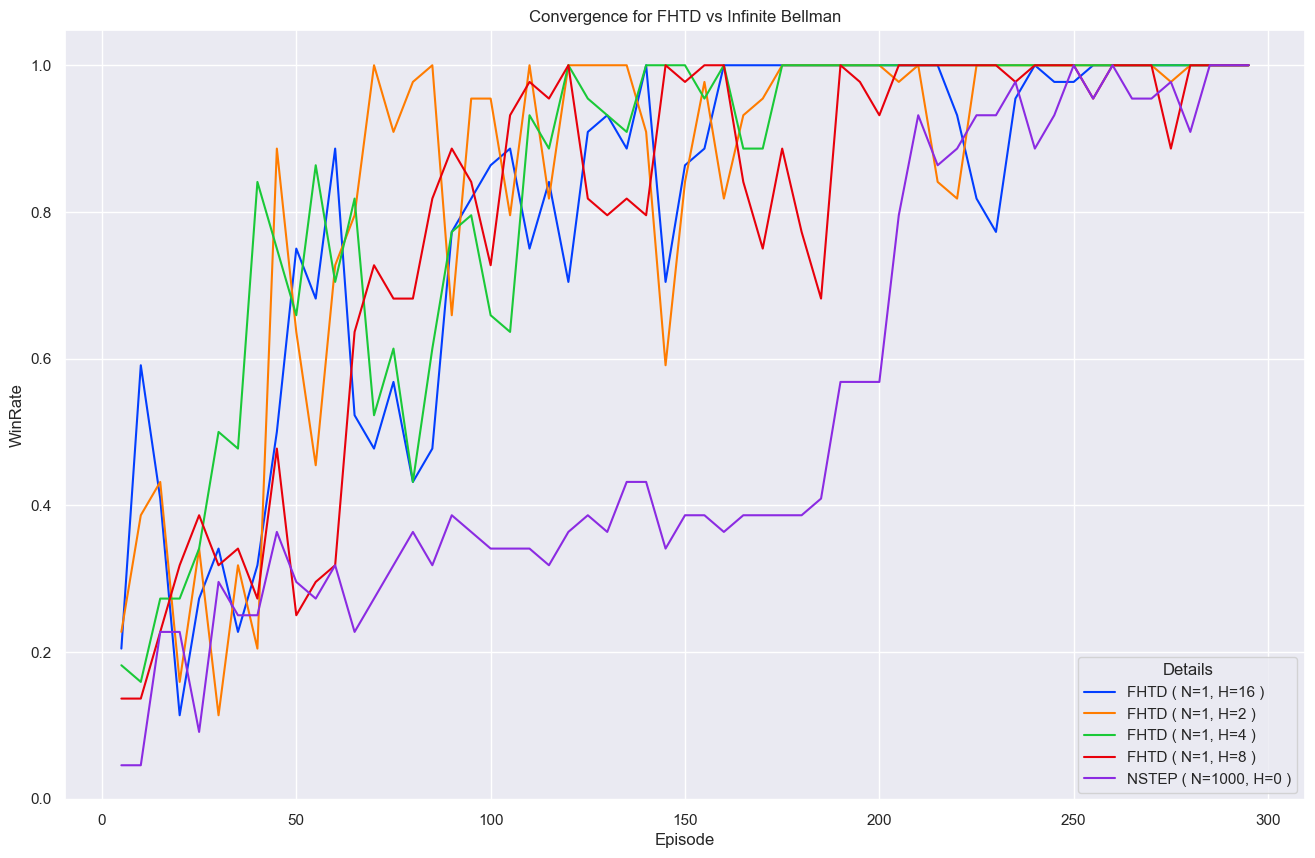

In [87]:
sns.lineplot( data=wr[(wr['Slippery']==True) & (wr['Model']!='NSTEPFHTD') & ( (wr['Horizon']>1) | (wr['Steps']==1000) ) & (wr['Episode']<300)], x='Episode', y='WinRate', hue='Details', palette='bright' )
plt.title( 'Convergence for FHTD vs Infinite Bellman' )
plt.show( )

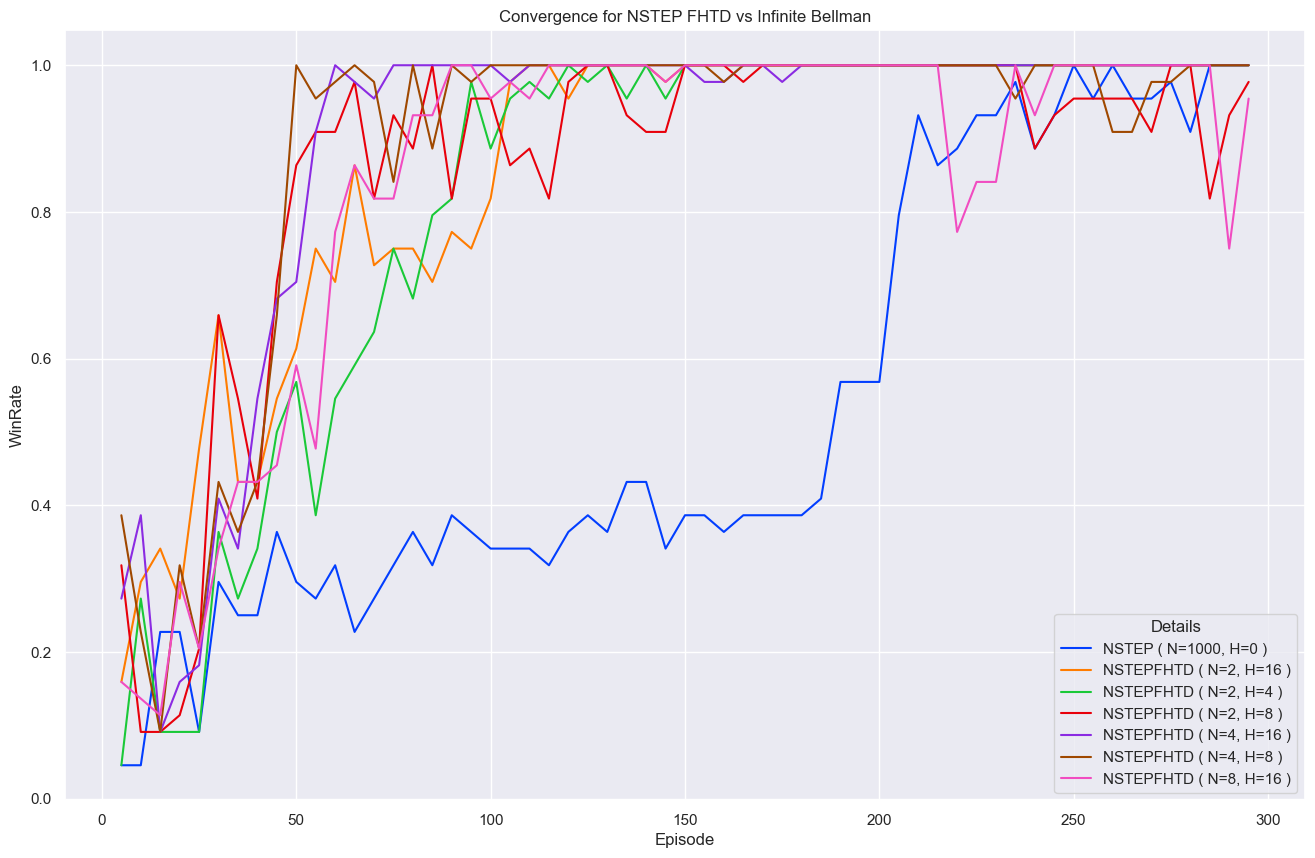

In [88]:
sns.lineplot( data=wr[(wr['Slippery']==True) & (wr['Model']!='FHTD') & ( (wr['Horizon']>1) | (wr['Steps']==1000) ) & (wr['Episode']<300)], x='Episode', y='WinRate', hue='Details', palette='bright' )
plt.title( 'Convergence for NSTEP FHTD vs Infinite Bellman' )
plt.show( )

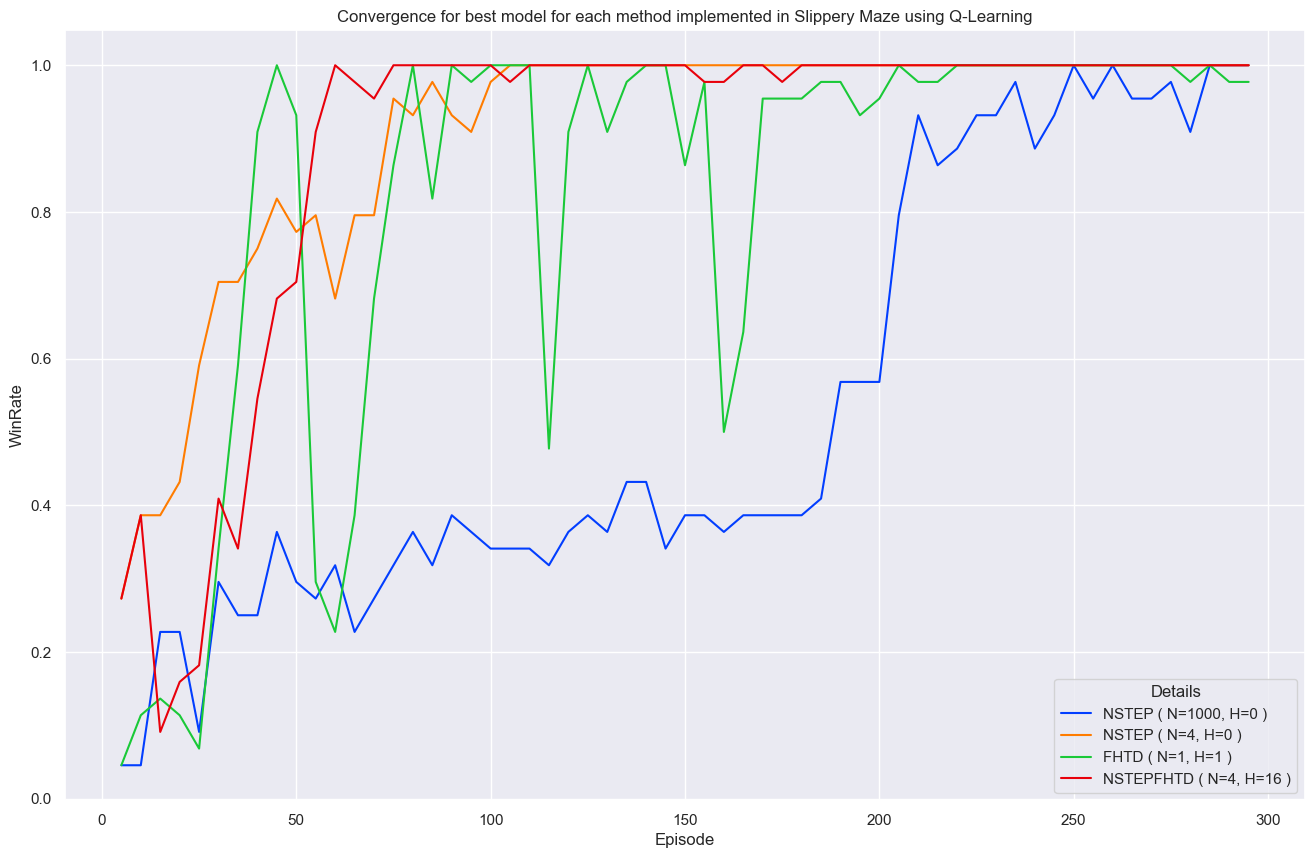

In [115]:
wr['WinRate_1'] = wr['WinRate'].shift( 1 )

wr_best = pd.concat( [
    wr[(wr['Steps']==1000)],
    wr.merge( wr[(wr['Model']=='NSTEP') & (wr['WinRate']==1.0) & (wr['WinRate_1']==1.0)].sort_values( by='Episode', ascending=True )[:1][merge_columns], how='inner', on=merge_columns ),
    wr.merge( wr[(wr['Model']=='FHTD') & (wr['WinRate']==1.0) & (wr['WinRate_1']==1.0)].sort_values( by='Episode', ascending=True )[:1][merge_columns], how='inner', on=merge_columns ),
    wr.merge( wr[(wr['Model']=='NSTEPFHTD') & (wr['WinRate']==1.0) & (wr['WinRate_1']==1.0)].sort_values( by='Episode', ascending=True )[:1][merge_columns], how='inner', on=merge_columns )
], ignore_index=True )

sns.lineplot( data=wr_best[(wr_best['Episode']<300)], x='Episode', y='WinRate', hue='Details', palette='bright' )
plt.title( 'Convergence for best model for each method implemented in Slippery Maze using Q-Learning' )
plt.show( )

# Mean Episode Length

In [81]:
me = pd.read_excel( 'MeanEpisodeLength.xlsx' )
me.sort_values( by=['MeanEpisodeLength'], ascending=False, inplace=True )
me['Details'] = me['Model'] + ' ( N=' + me['Steps'].astype(str) + ', H=' + me['Horizon'].astype(str) + ' )'
me.head( )

,Slippery,Model,Horizon,Steps,Alpha,MeanEpisodeLength,Details
0,True,NSTEP,0,1000,0.1,39.524,"NSTEP ( N=1000, H=0 )"
8,True,FHTD,1,1,0.1,38.810,"FHTD ( N=1, H=1 )"
7,True,FHTD,2,1,0.1,32.412,"FHTD ( N=1, H=2 )"
6,True,FHTD,4,1,0.1,30.708,"FHTD ( N=1, H=4 )"
2,True,NSTEP,0,8,0.1,30.202,"NSTEP ( N=8, H=0 )"


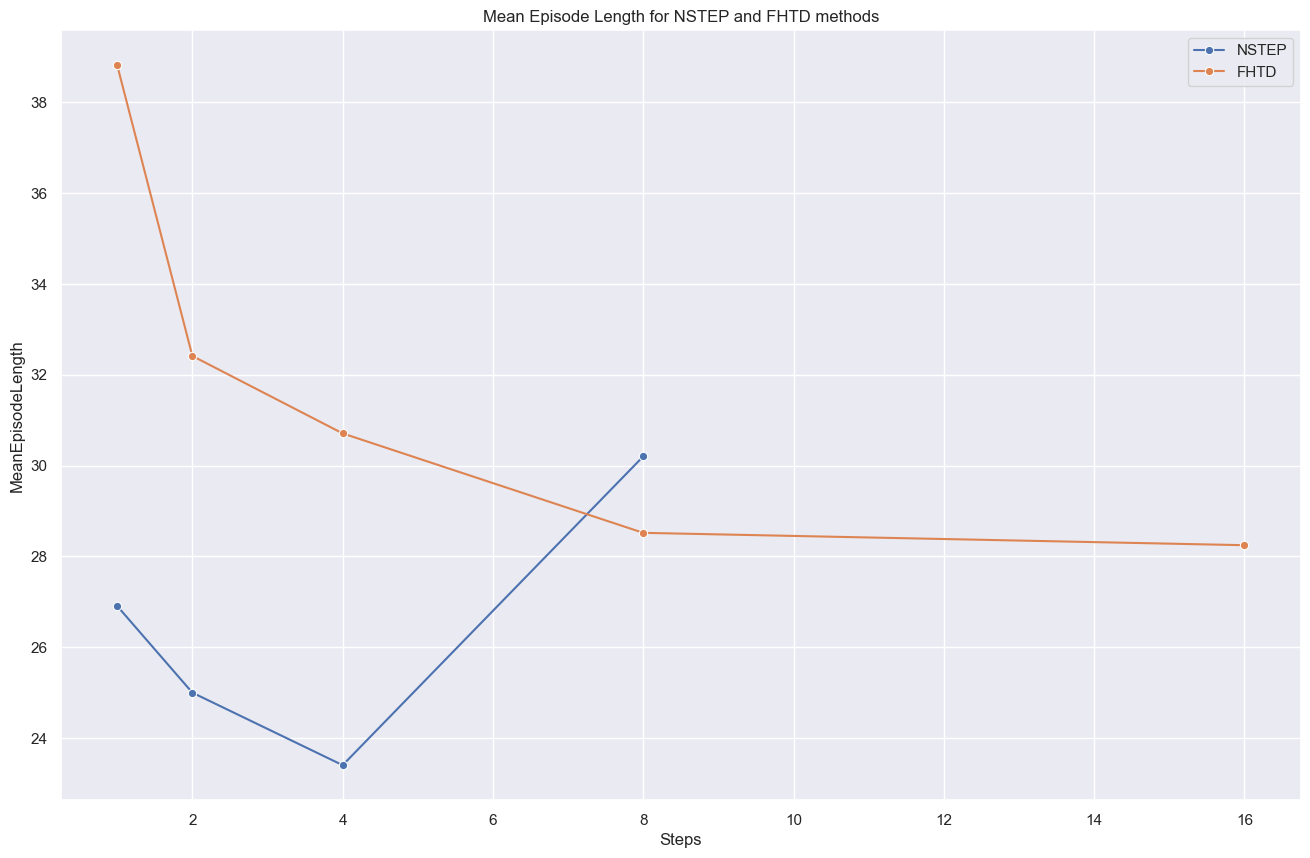

In [116]:
sns.lineplot( data=me[(me['Slippery']==True) & (me['Model']=='NSTEP') & (me['Steps']<=16)], x='Steps', y='MeanEpisodeLength', label='NSTEP', marker='o', palette='bright' )
sns.lineplot( data=me[(me['Slippery']==True) & (me['Model']=='FHTD')], x='Horizon', y='MeanEpisodeLength', label='FHTD', marker='o', palette='bright' )

plt.title( 'Mean Episode Length for NSTEP and FHTD methods' )
plt.show( )

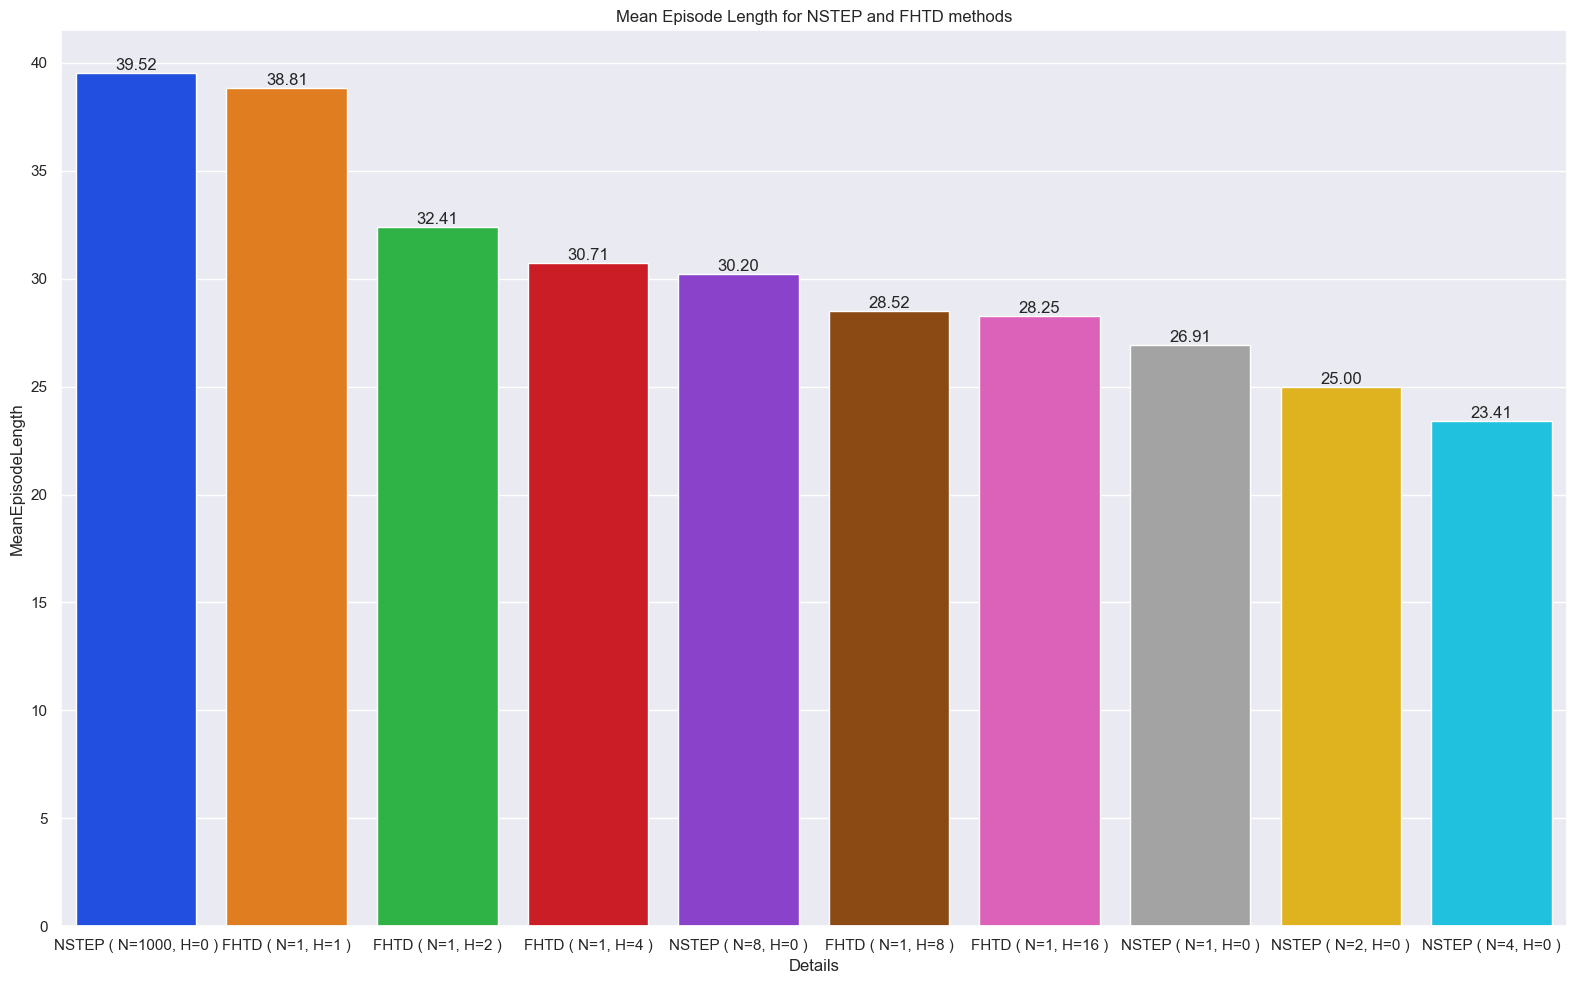

In [117]:
ax = sns.barplot( data=me[(me['Slippery']==True) & (me['Model']!='NSTEPFHTD')], x='Details', y='MeanEpisodeLength', palette='bright' )

for container in ax.containers:
    ax.bar_label( container, fmt='%0.2f' )

plt.title( 'Mean Episode Length for NSTEP and FHTD methods' )
plt.tight_layout( )
plt.show( )

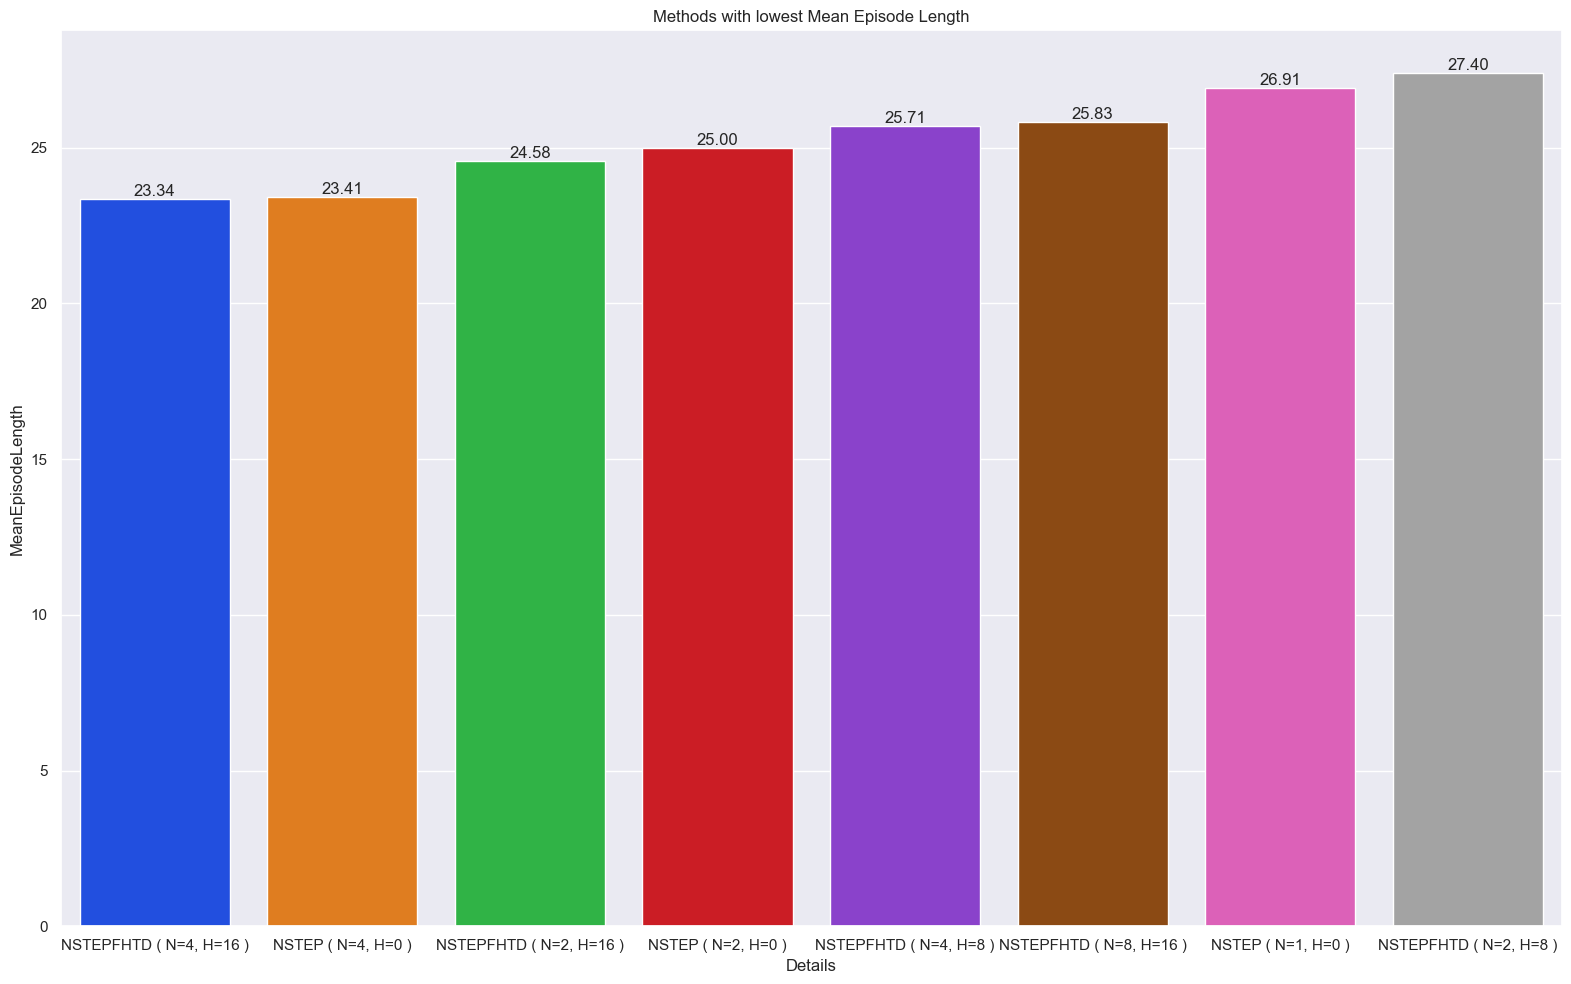

In [86]:
ax = sns.barplot( data=me[(me['Slippery']==True)].sort_values( by=['MeanEpisodeLength'] )[:8], x='Details', y='MeanEpisodeLength', palette='bright' )

for container in ax.containers:
    ax.bar_label( container, fmt='%0.2f' )

plt.title( 'Methods with lowest Mean Episode Length' )
plt.tight_layout( )
plt.show( )